In [2]:
pip install pymitter

  Using cached pymitter-0.3.1.tar.gz (6.2 kB)
  Created wheel for pymitter: filename=pymitter-0.3.1-py3-none-any.whl size=5890 sha256=ff1e339b61144411a4c35d777f43fd617e63c2d824253bf2fe794abe5027e96f
  Stored in directory: /home/hdsp/.cache/pip/wheels/22/e5/f0/4af4784c7233fa105ec393a6ed8b65713f04f28f66347c380a
Successfully built pymitter
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'Receivers')

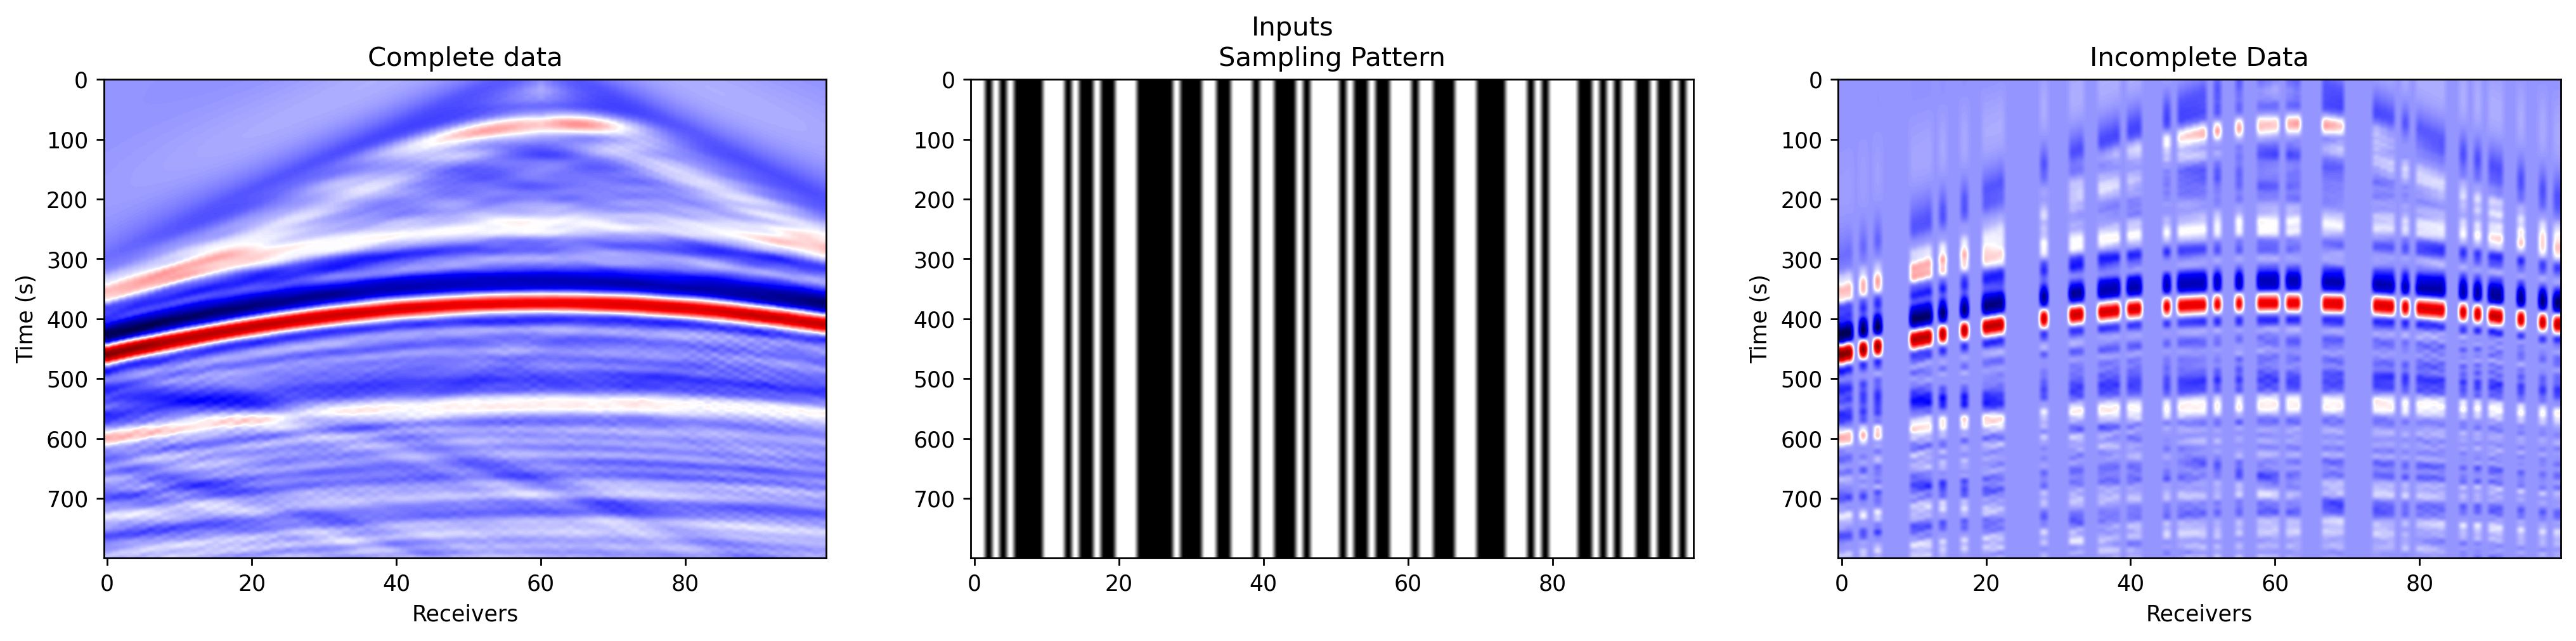

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from skimage.metrics import structural_similarity as ssim
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
import math


from Function import *
import scipy


x = np.load('../data/data.npy')
x = x.T
x = x / np.abs(x).max()
maxiter =1000


'''
---------------  SAMPLING --------------------
'''
sr_rand = 0.5 # 1-compression
y_rand, pattern_rand, pattern_index= random_sampling(x,sr_rand)
H = pattern_index


# Sampling pattern
H0 = np.tile(pattern_rand.reshape(1,-1),(x.shape[0],1))


''' ---------- Visualization of SAMPLING----------
'''
fig, axs = plt.subplots(1, 3,dpi=250,figsize=(20, 4))
fig.suptitle('Inputs')

axs[0].imshow(x, cmap='seismic', aspect='auto')
axs[0].set_title('Complete data')
axs[0].set_ylabel('Time (s)')
axs[0].set_xlabel('Receivers')

axs[1].imshow(H0, cmap ='gray',aspect='auto')
axs[1].set_title('Sampling Pattern')

axs[2].imshow(y_rand, cmap='seismic', aspect='auto')
axs[2].set_title('Incomplete Data')
axs[2].set_ylabel('Time (s)')
axs[2].set_xlabel('Receivers')

In [7]:
index = 10


case = 'ADMM' 

#----------------- ADMM --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
rho = 1
gamma = 1
lmb = 5e-4

x_result_ADMM, hist = Alg.ADMM(rho, gamma, lmb, maxiter)

---------ADMM method---------- 

itr 	 ||x-xold|| 	 PSNR 

ADMM-TV: Iteration   5,  Error = 0.15, PSNR = 32.12 dB, time = 0.0s.
ADMM-TV: Iteration  10,  Error = 0.04, PSNR = 44.11 dB, time = 0.1s.
ADMM-TV: Iteration  15,  Error = 0.01, PSNR = 53.64 dB, time = 0.1s.
ADMM-TV: Iteration  20,  Error = 0.01, PSNR = 61.16 dB, time = 0.2s.
ADMM-TV: Iteration  25,  Error = 0.00, PSNR = 66.52 dB, time = 0.2s.
ADMM-TV: Iteration  30,  Error = 0.00, PSNR = 71.27 dB, time = 0.2s.
ADMM-TV: Iteration  35,  Error = 0.00, PSNR = 75.50 dB, time = 0.3s.
ADMM-TV: Iteration  40,  Error = 0.00, PSNR = 82.71 dB, time = 0.3s.
ADMM-TV: Iteration  45,  Error = 0.00, PSNR = 89.07 dB, time = 0.3s.
ADMM-TV: Iteration  50,  Error = 0.00, PSNR = 94.02 dB, time = 0.4s.
ADMM-TV: Iteration  55,  Error = 0.00, PSNR = 98.61 dB, time = 0.4s.
ADMM-TV: Iteration  60,  Error = 0.00, PSNR = 102.39 dB, time = 0.5s.
ADMM-TV: Iteration  65,  Error = 0.00, PSNR = 105.79 dB, time = 0.5s.
ADMM-TV: Iteration  70,  Error = 0.00, PSN

ADMM-TV: Iteration 595,  Error = 0.00, PSNR = 320.33 dB, time = 4.5s.
ADMM-TV: Iteration 600,  Error = 0.00, PSNR = 320.37 dB, time = 4.5s.
ADMM-TV: Iteration 605,  Error = 0.00, PSNR = 320.29 dB, time = 4.6s.
ADMM-TV: Iteration 610,  Error = 0.00, PSNR = 320.31 dB, time = 4.6s.
ADMM-TV: Iteration 615,  Error = 0.00, PSNR = 320.52 dB, time = 4.6s.
ADMM-TV: Iteration 620,  Error = 0.00, PSNR = 320.33 dB, time = 4.7s.
ADMM-TV: Iteration 625,  Error = 0.00, PSNR = 320.39 dB, time = 4.7s.
ADMM-TV: Iteration 630,  Error = 0.00, PSNR = 320.34 dB, time = 4.7s.
ADMM-TV: Iteration 635,  Error = 0.00, PSNR = 320.27 dB, time = 4.8s.
ADMM-TV: Iteration 640,  Error = 0.00, PSNR = 320.38 dB, time = 4.8s.
ADMM-TV: Iteration 645,  Error = 0.00, PSNR = 320.21 dB, time = 4.9s.
ADMM-TV: Iteration 650,  Error = 0.00, PSNR = 320.24 dB, time = 4.9s.
ADMM-TV: Iteration 655,  Error = 0.00, PSNR = 320.30 dB, time = 4.9s.
ADMM-TV: Iteration 660,  Error = 0.00, PSNR = 320.39 dB, time = 5.0s.
ADMM-TV: Iteration 6

Text(0, 0.5, 'Error')

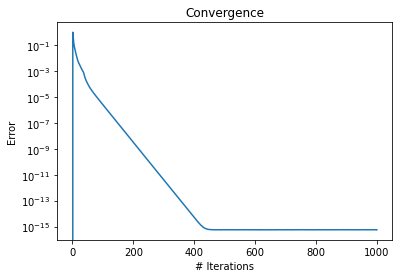

In [5]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

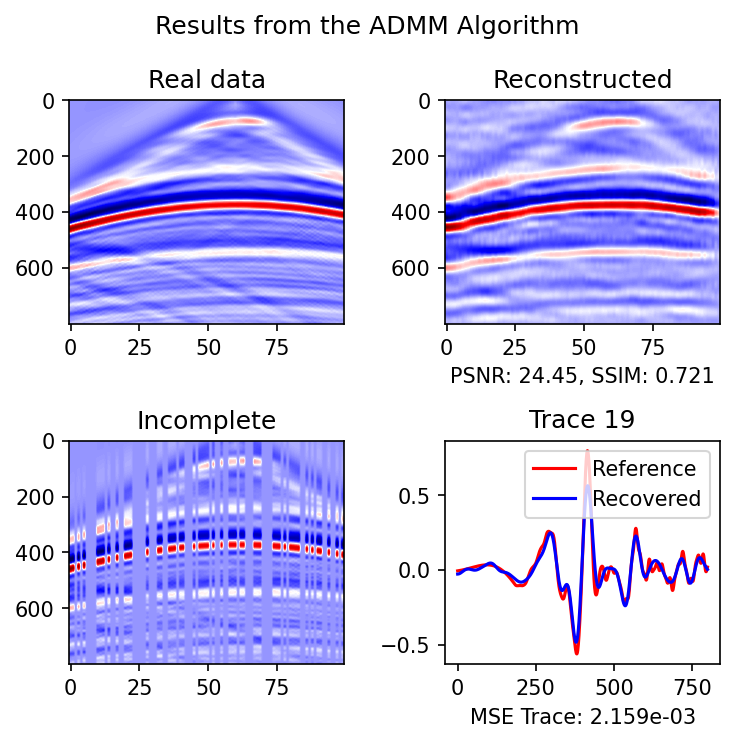

In [4]:
x_rec = x_result_ADMM.copy()

temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

In [2]:
index = 10


case = 'FISTA' 

#----------------- FISTA --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
tau = 0.1
mu = 0.3
x_result_FISTA, hist = Alg.FISTA(tau, mu, maxiter)


 FISTA: 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 6.797 dB 

2 	 Error: 4.1177e-01 	 PSNR: 13.303 dB 

3 	 Error: 2.6979e-01 	 PSNR: 16.547 dB 

4 	 Error: 1.7459e-01 	 PSNR: 18.193 dB 

5 	 Error: 1.0672e-01 	 PSNR: 18.967 dB 

6 	 Error: 5.7910e-02 	 PSNR: 19.262 dB 

7 	 Error: 2.4121e-02 	 PSNR: 19.297 dB 

8 	 Error: 2.9198e-03 	 PSNR: 19.203 dB 

9 	 Error: 8.2869e-03 	 PSNR: 19.066 dB 

10 	 Error: 1.1648e-02 	 PSNR: 18.946 dB 

11 	 Error: 1.0138e-02 	 PSNR: 18.870 dB 

12 	 Error: 6.4251e-03 	 PSNR: 18.843 dB 

13 	 Error: 2.6519e-03 	 PSNR: 18.853 dB 

14 	 Error: 1.2825e-03 	 PSNR: 18.882 dB 

15 	 Error: 2.3750e-03 	 PSNR: 18.915 dB 

16 	 Error: 2.6525e-03 	 PSNR: 18.942 dB 

17 	 Error: 2.2598e-03 	 PSNR: 18.959 dB 

18 	 Error: 1.7124e-03 	 PSNR: 18.967 dB 

19 	 Error: 1.4456e-03 	 PSNR: 18.968 dB 

20 	 Error: 1.4900e-03 	 PSNR: 18.967 dB 

21 	 Error: 1.5829e-03 	 PSNR: 18.966 dB 

22 	 Error: 1.6155e-03 	 PSNR: 18.968 dB 

23 	 Error: 1.6196e-03 	 PSN

202 	 Error: 3.2785e-03 	 PSNR: 22.687 dB 

203 	 Error: 3.2721e-03 	 PSNR: 22.719 dB 

204 	 Error: 3.2660e-03 	 PSNR: 22.752 dB 

205 	 Error: 3.2598e-03 	 PSNR: 22.785 dB 

206 	 Error: 3.2537e-03 	 PSNR: 22.818 dB 

207 	 Error: 3.2469e-03 	 PSNR: 22.851 dB 

208 	 Error: 3.2413e-03 	 PSNR: 22.884 dB 

209 	 Error: 3.2362e-03 	 PSNR: 22.917 dB 

210 	 Error: 3.2303e-03 	 PSNR: 22.950 dB 

211 	 Error: 3.2240e-03 	 PSNR: 22.984 dB 

212 	 Error: 3.2178e-03 	 PSNR: 23.018 dB 

213 	 Error: 3.2104e-03 	 PSNR: 23.052 dB 

214 	 Error: 3.2022e-03 	 PSNR: 23.086 dB 

215 	 Error: 3.1940e-03 	 PSNR: 23.120 dB 

216 	 Error: 3.1850e-03 	 PSNR: 23.154 dB 

217 	 Error: 3.1771e-03 	 PSNR: 23.188 dB 

218 	 Error: 3.1688e-03 	 PSNR: 23.222 dB 

219 	 Error: 3.1611e-03 	 PSNR: 23.257 dB 

220 	 Error: 3.1524e-03 	 PSNR: 23.292 dB 

221 	 Error: 3.1446e-03 	 PSNR: 23.326 dB 

222 	 Error: 3.1366e-03 	 PSNR: 23.361 dB 

223 	 Error: 3.1285e-03 	 PSNR: 23.396 dB 

224 	 Error: 3.1208e-03 	 PSNR: 

405 	 Error: 1.6117e-03 	 PSNR: 30.702 dB 

406 	 Error: 1.6031e-03 	 PSNR: 30.741 dB 

407 	 Error: 1.5949e-03 	 PSNR: 30.780 dB 

408 	 Error: 1.5860e-03 	 PSNR: 30.819 dB 

409 	 Error: 1.5776e-03 	 PSNR: 30.857 dB 

410 	 Error: 1.5698e-03 	 PSNR: 30.896 dB 

411 	 Error: 1.5626e-03 	 PSNR: 30.934 dB 

412 	 Error: 1.5561e-03 	 PSNR: 30.972 dB 

413 	 Error: 1.5494e-03 	 PSNR: 31.010 dB 

414 	 Error: 1.5426e-03 	 PSNR: 31.048 dB 

415 	 Error: 1.5363e-03 	 PSNR: 31.086 dB 

416 	 Error: 1.5298e-03 	 PSNR: 31.124 dB 

417 	 Error: 1.5233e-03 	 PSNR: 31.162 dB 

418 	 Error: 1.5172e-03 	 PSNR: 31.200 dB 

419 	 Error: 1.5107e-03 	 PSNR: 31.238 dB 

420 	 Error: 1.5037e-03 	 PSNR: 31.276 dB 

421 	 Error: 1.4976e-03 	 PSNR: 31.313 dB 

422 	 Error: 1.4916e-03 	 PSNR: 31.351 dB 

423 	 Error: 1.4866e-03 	 PSNR: 31.388 dB 

424 	 Error: 1.4825e-03 	 PSNR: 31.425 dB 

425 	 Error: 1.4789e-03 	 PSNR: 31.463 dB 

426 	 Error: 1.4753e-03 	 PSNR: 31.500 dB 

427 	 Error: 1.4707e-03 	 PSNR: 

613 	 Error: 6.1182e-04 	 PSNR: 35.075 dB 

614 	 Error: 6.0723e-04 	 PSNR: 35.079 dB 

615 	 Error: 6.0320e-04 	 PSNR: 35.084 dB 

616 	 Error: 5.9887e-04 	 PSNR: 35.088 dB 

617 	 Error: 5.9237e-04 	 PSNR: 35.093 dB 

618 	 Error: 5.8616e-04 	 PSNR: 35.097 dB 

619 	 Error: 5.7893e-04 	 PSNR: 35.101 dB 

620 	 Error: 5.7141e-04 	 PSNR: 35.105 dB 

621 	 Error: 5.6490e-04 	 PSNR: 35.108 dB 

622 	 Error: 5.5922e-04 	 PSNR: 35.111 dB 

623 	 Error: 5.5347e-04 	 PSNR: 35.115 dB 

624 	 Error: 5.4828e-04 	 PSNR: 35.118 dB 

625 	 Error: 5.4272e-04 	 PSNR: 35.121 dB 

626 	 Error: 5.3867e-04 	 PSNR: 35.124 dB 

627 	 Error: 5.3461e-04 	 PSNR: 35.126 dB 

628 	 Error: 5.2975e-04 	 PSNR: 35.129 dB 

629 	 Error: 5.2500e-04 	 PSNR: 35.132 dB 

630 	 Error: 5.1964e-04 	 PSNR: 35.135 dB 

631 	 Error: 5.1418e-04 	 PSNR: 35.137 dB 

632 	 Error: 5.0892e-04 	 PSNR: 35.140 dB 

633 	 Error: 5.0330e-04 	 PSNR: 35.143 dB 

634 	 Error: 4.9872e-04 	 PSNR: 35.145 dB 

635 	 Error: 4.9469e-04 	 PSNR: 

819 	 Error: 1.5839e-04 	 PSNR: 35.257 dB 

820 	 Error: 1.5743e-04 	 PSNR: 35.257 dB 

821 	 Error: 1.5718e-04 	 PSNR: 35.257 dB 

822 	 Error: 1.5745e-04 	 PSNR: 35.256 dB 

823 	 Error: 1.5826e-04 	 PSNR: 35.256 dB 

824 	 Error: 1.5910e-04 	 PSNR: 35.256 dB 

825 	 Error: 1.5979e-04 	 PSNR: 35.255 dB 

826 	 Error: 1.6016e-04 	 PSNR: 35.255 dB 

827 	 Error: 1.6072e-04 	 PSNR: 35.255 dB 

828 	 Error: 1.6102e-04 	 PSNR: 35.254 dB 

829 	 Error: 1.6153e-04 	 PSNR: 35.254 dB 

830 	 Error: 1.6170e-04 	 PSNR: 35.253 dB 

831 	 Error: 1.6232e-04 	 PSNR: 35.253 dB 

832 	 Error: 1.6264e-04 	 PSNR: 35.253 dB 

833 	 Error: 1.6238e-04 	 PSNR: 35.252 dB 

834 	 Error: 1.6138e-04 	 PSNR: 35.252 dB 

835 	 Error: 1.5974e-04 	 PSNR: 35.252 dB 

836 	 Error: 1.5806e-04 	 PSNR: 35.252 dB 

837 	 Error: 1.5617e-04 	 PSNR: 35.251 dB 

838 	 Error: 1.5386e-04 	 PSNR: 35.251 dB 

839 	 Error: 1.5195e-04 	 PSNR: 35.251 dB 

840 	 Error: 1.5032e-04 	 PSNR: 35.251 dB 

841 	 Error: 1.4957e-04 	 PSNR: 

Text(0, 0.5, 'Error')

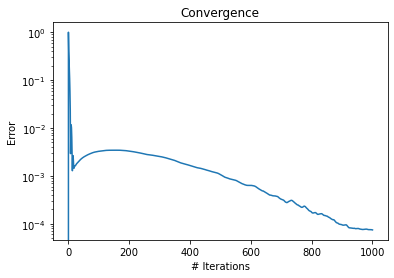

In [3]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

In [4]:
np.max(x) #_result_FISTA)

1.0

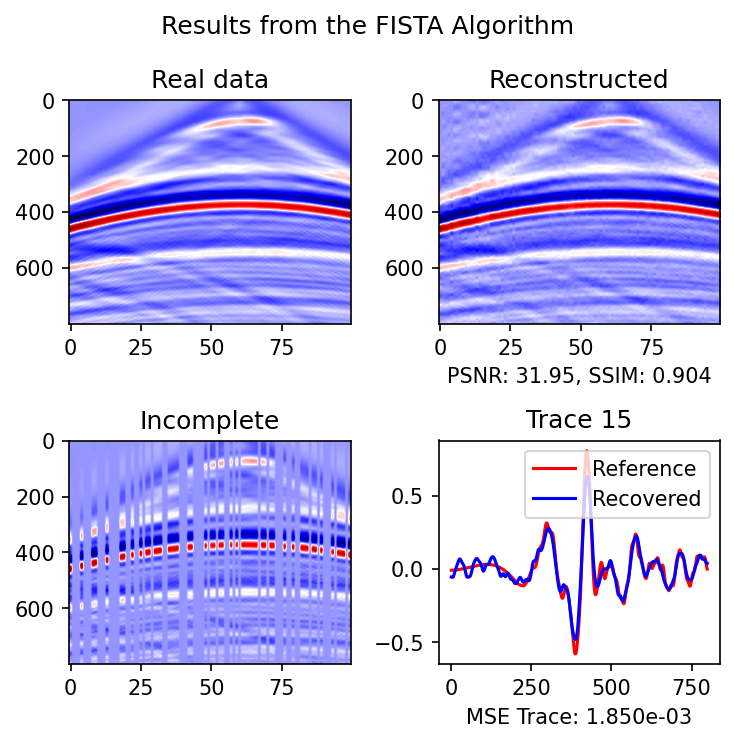

In [5]:
x_rec = x_result_FISTA.copy()

temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

In [6]:
case = 'GAP' 

# ------------------GAP--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
tau = 1e-0
x_result_GAP, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter





---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 18.876 dB 

2 	 Error: 3.0092e-03 	 PSNR: 18.884 dB 

3 	 Error: 2.8756e-03 	 PSNR: 18.893 dB 

4 	 Error: 2.7666e-03 	 PSNR: 18.903 dB 

5 	 Error: 2.6742e-03 	 PSNR: 18.913 dB 

6 	 Error: 2.5970e-03 	 PSNR: 18.923 dB 

7 	 Error: 2.5298e-03 	 PSNR: 18.933 dB 

8 	 Error: 2.4677e-03 	 PSNR: 18.942 dB 

9 	 Error: 2.4086e-03 	 PSNR: 18.951 dB 

10 	 Error: 2.3565e-03 	 PSNR: 18.961 dB 

11 	 Error: 2.3082e-03 	 PSNR: 18.970 dB 

12 	 Error: 2.2687e-03 	 PSNR: 18.979 dB 

13 	 Error: 2.2307e-03 	 PSNR: 18.989 dB 

14 	 Error: 2.1947e-03 	 PSNR: 18.998 dB 

15 	 Error: 2.1621e-03 	 PSNR: 19.007 dB 

16 	 Error: 2.1318e-03 	 PSNR: 19.015 dB 

17 	 Error: 2.1041e-03 	 PSNR: 19.024 dB 

18 	 Error: 2.0796e-03 	 PSNR: 19.033 dB 

19 	 Error: 2.0553e-03 	 PSNR: 19.042 dB 

20 	 Error: 2.0320e-03 	 PSNR: 19.051 dB 

21 	 Error: 2.0110e-03 	 PSNR: 19.060 dB 

22 	 Error: 1.9933e-03 	 PSNR: 19.069 dB 

23 	 

211 	 Error: 9.8690e-04 	 PSNR: 20.502 dB 

212 	 Error: 9.8533e-04 	 PSNR: 20.509 dB 

213 	 Error: 9.8326e-04 	 PSNR: 20.516 dB 

214 	 Error: 9.8136e-04 	 PSNR: 20.523 dB 

215 	 Error: 9.7965e-04 	 PSNR: 20.530 dB 

216 	 Error: 9.7828e-04 	 PSNR: 20.537 dB 

217 	 Error: 9.7652e-04 	 PSNR: 20.543 dB 

218 	 Error: 9.7502e-04 	 PSNR: 20.550 dB 

219 	 Error: 9.7345e-04 	 PSNR: 20.557 dB 

220 	 Error: 9.7139e-04 	 PSNR: 20.564 dB 

221 	 Error: 9.6893e-04 	 PSNR: 20.571 dB 

222 	 Error: 9.6427e-04 	 PSNR: 20.578 dB 

223 	 Error: 9.5907e-04 	 PSNR: 20.585 dB 

224 	 Error: 9.5504e-04 	 PSNR: 20.592 dB 

225 	 Error: 9.5264e-04 	 PSNR: 20.599 dB 

226 	 Error: 9.5084e-04 	 PSNR: 20.606 dB 

227 	 Error: 9.4842e-04 	 PSNR: 20.613 dB 

228 	 Error: 9.4564e-04 	 PSNR: 20.620 dB 

229 	 Error: 9.4357e-04 	 PSNR: 20.627 dB 

230 	 Error: 9.4132e-04 	 PSNR: 20.634 dB 

231 	 Error: 9.3935e-04 	 PSNR: 20.640 dB 

232 	 Error: 9.3772e-04 	 PSNR: 20.647 dB 

233 	 Error: 9.3653e-04 	 PSNR: 

412 	 Error: 6.9940e-04 	 PSNR: 21.840 dB 

413 	 Error: 6.9896e-04 	 PSNR: 21.846 dB 

414 	 Error: 6.9856e-04 	 PSNR: 21.853 dB 

415 	 Error: 6.9807e-04 	 PSNR: 21.859 dB 

416 	 Error: 6.9727e-04 	 PSNR: 21.866 dB 

417 	 Error: 6.9647e-04 	 PSNR: 21.872 dB 

418 	 Error: 6.9544e-04 	 PSNR: 21.878 dB 

419 	 Error: 6.9461e-04 	 PSNR: 21.885 dB 

420 	 Error: 6.9367e-04 	 PSNR: 21.891 dB 

421 	 Error: 6.9288e-04 	 PSNR: 21.897 dB 

422 	 Error: 6.9201e-04 	 PSNR: 21.904 dB 

423 	 Error: 6.9043e-04 	 PSNR: 21.910 dB 

424 	 Error: 6.8912e-04 	 PSNR: 21.917 dB 

425 	 Error: 6.8798e-04 	 PSNR: 21.923 dB 

426 	 Error: 6.8667e-04 	 PSNR: 21.929 dB 

427 	 Error: 6.8546e-04 	 PSNR: 21.936 dB 

428 	 Error: 6.8422e-04 	 PSNR: 21.942 dB 

429 	 Error: 6.8324e-04 	 PSNR: 21.948 dB 

430 	 Error: 6.8248e-04 	 PSNR: 21.955 dB 

431 	 Error: 6.8161e-04 	 PSNR: 21.961 dB 

432 	 Error: 6.8075e-04 	 PSNR: 21.967 dB 

433 	 Error: 6.7985e-04 	 PSNR: 21.974 dB 

434 	 Error: 6.7882e-04 	 PSNR: 

631 	 Error: 4.9571e-04 	 PSNR: 23.182 dB 

632 	 Error: 4.9430e-04 	 PSNR: 23.188 dB 

633 	 Error: 4.9295e-04 	 PSNR: 23.194 dB 

634 	 Error: 4.9197e-04 	 PSNR: 23.200 dB 

635 	 Error: 4.9120e-04 	 PSNR: 23.206 dB 

636 	 Error: 4.9048e-04 	 PSNR: 23.211 dB 

637 	 Error: 4.8985e-04 	 PSNR: 23.217 dB 

638 	 Error: 4.8925e-04 	 PSNR: 23.223 dB 

639 	 Error: 4.8872e-04 	 PSNR: 23.229 dB 

640 	 Error: 4.8820e-04 	 PSNR: 23.235 dB 

641 	 Error: 4.8766e-04 	 PSNR: 23.241 dB 

642 	 Error: 4.8708e-04 	 PSNR: 23.247 dB 

643 	 Error: 4.8645e-04 	 PSNR: 23.252 dB 

644 	 Error: 4.8567e-04 	 PSNR: 23.258 dB 

645 	 Error: 4.8490e-04 	 PSNR: 23.264 dB 

646 	 Error: 4.8419e-04 	 PSNR: 23.270 dB 

647 	 Error: 4.8357e-04 	 PSNR: 23.276 dB 

648 	 Error: 4.8289e-04 	 PSNR: 23.282 dB 

649 	 Error: 4.8218e-04 	 PSNR: 23.287 dB 

650 	 Error: 4.8151e-04 	 PSNR: 23.293 dB 

651 	 Error: 4.8088e-04 	 PSNR: 23.299 dB 

652 	 Error: 4.8029e-04 	 PSNR: 23.305 dB 

653 	 Error: 4.7980e-04 	 PSNR: 

860 	 Error: 3.8257e-04 	 PSNR: 24.490 dB 

861 	 Error: 3.8224e-04 	 PSNR: 24.496 dB 

862 	 Error: 3.8195e-04 	 PSNR: 24.501 dB 

863 	 Error: 3.8165e-04 	 PSNR: 24.507 dB 

864 	 Error: 3.8137e-04 	 PSNR: 24.513 dB 

865 	 Error: 3.8110e-04 	 PSNR: 24.518 dB 

866 	 Error: 3.8086e-04 	 PSNR: 24.524 dB 

867 	 Error: 3.8062e-04 	 PSNR: 24.529 dB 

868 	 Error: 3.8029e-04 	 PSNR: 24.535 dB 

869 	 Error: 3.7998e-04 	 PSNR: 24.541 dB 

870 	 Error: 3.7973e-04 	 PSNR: 24.546 dB 

871 	 Error: 3.7950e-04 	 PSNR: 24.552 dB 

872 	 Error: 3.7929e-04 	 PSNR: 24.557 dB 

873 	 Error: 3.7889e-04 	 PSNR: 24.563 dB 

874 	 Error: 3.7857e-04 	 PSNR: 24.568 dB 

875 	 Error: 3.7830e-04 	 PSNR: 24.574 dB 

876 	 Error: 3.7802e-04 	 PSNR: 24.580 dB 

877 	 Error: 3.7765e-04 	 PSNR: 24.585 dB 

878 	 Error: 3.7730e-04 	 PSNR: 24.591 dB 

879 	 Error: 3.7701e-04 	 PSNR: 24.596 dB 

880 	 Error: 3.7670e-04 	 PSNR: 24.602 dB 

881 	 Error: 3.7641e-04 	 PSNR: 24.607 dB 

882 	 Error: 3.7607e-04 	 PSNR: 

Text(0, 0.5, 'Error')

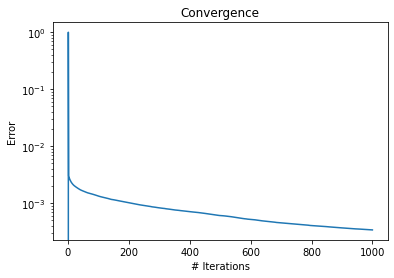

In [7]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')

plt.xlabel('# Iterations')
plt.ylabel('Error')

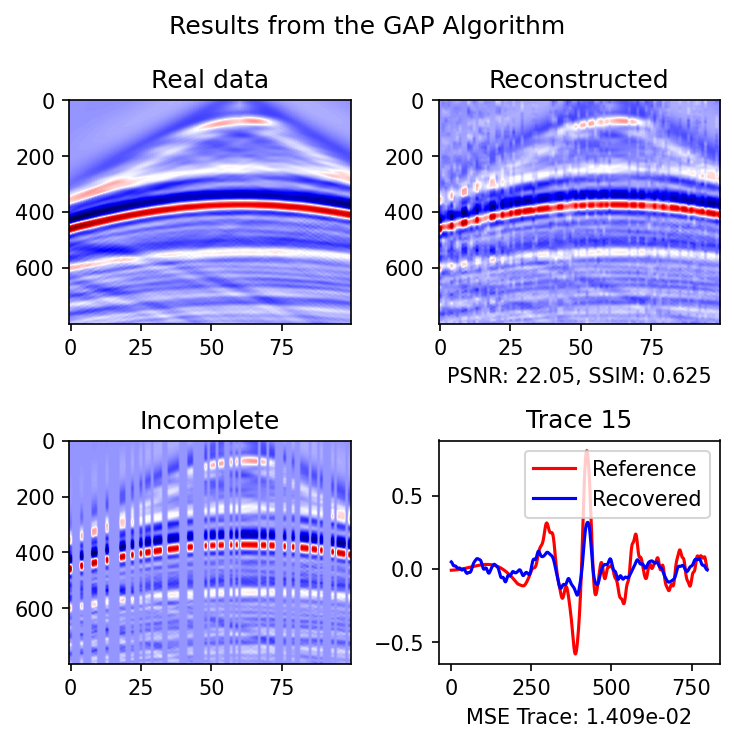

In [8]:
# -----------------
x_rec = x_result_GAP.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

In [9]:
case = 'TWIST' 

# ------------------TwIST--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
# default parameters
alpha = 1.2
beta  = 1.998
tau = 0.9

x_result_TWIST, hist = Alg.TwIST(tau, alpha, beta, maxiter)



---------TwIST method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.054 dB 

2 	 Error: 3.9433e+00 	 PSNR: 9.753 dB 

3 	 Error: 6.8354e-01 	 PSNR: 20.754 dB 

4 	 Error: 4.1920e-01 	 PSNR: 17.978 dB 

5 	 Error: 1.2378e-01 	 PSNR: 19.189 dB 

6 	 Error: 2.5850e-02 	 PSNR: 18.991 dB 

7 	 Error: 6.8862e-03 	 PSNR: 18.969 dB 

8 	 Error: 1.0442e-02 	 PSNR: 19.065 dB 

9 	 Error: 7.6119e-03 	 PSNR: 19.033 dB 

10 	 Error: 5.7334e-03 	 PSNR: 19.081 dB 

11 	 Error: 4.6098e-03 	 PSNR: 19.089 dB 

12 	 Error: 4.4492e-03 	 PSNR: 19.113 dB 

13 	 Error: 4.3204e-03 	 PSNR: 19.130 dB 

14 	 Error: 4.2348e-03 	 PSNR: 19.150 dB 

15 	 Error: 4.1601e-03 	 PSNR: 19.170 dB 

16 	 Error: 4.0809e-03 	 PSNR: 19.190 dB 

17 	 Error: 4.0161e-03 	 PSNR: 19.210 dB 

18 	 Error: 3.9430e-03 	 PSNR: 19.228 dB 

19 	 Error: 3.8732e-03 	 PSNR: 19.247 dB 

20 	 Error: 3.8156e-03 	 PSNR: 19.265 dB 

21 	 Error: 3.7678e-03 	 PSNR: 19.284 dB 

22 	 Error: 3.7229e-03 	 PSNR: 19.302 dB 

23 	

203 	 Error: 1.4732e-03 	 PSNR: 22.120 dB 

204 	 Error: 1.4693e-03 	 PSNR: 22.134 dB 

205 	 Error: 1.4630e-03 	 PSNR: 22.148 dB 

206 	 Error: 1.4581e-03 	 PSNR: 22.162 dB 

207 	 Error: 1.4505e-03 	 PSNR: 22.176 dB 

208 	 Error: 1.4430e-03 	 PSNR: 22.190 dB 

209 	 Error: 1.4340e-03 	 PSNR: 22.204 dB 

210 	 Error: 1.4259e-03 	 PSNR: 22.218 dB 

211 	 Error: 1.4201e-03 	 PSNR: 22.232 dB 

212 	 Error: 1.4148e-03 	 PSNR: 22.246 dB 

213 	 Error: 1.4109e-03 	 PSNR: 22.260 dB 

214 	 Error: 1.4067e-03 	 PSNR: 22.274 dB 

215 	 Error: 1.4020e-03 	 PSNR: 22.288 dB 

216 	 Error: 1.3969e-03 	 PSNR: 22.302 dB 

217 	 Error: 1.3925e-03 	 PSNR: 22.316 dB 

218 	 Error: 1.3877e-03 	 PSNR: 22.330 dB 

219 	 Error: 1.3829e-03 	 PSNR: 22.344 dB 

220 	 Error: 1.3757e-03 	 PSNR: 22.358 dB 

221 	 Error: 1.3714e-03 	 PSNR: 22.372 dB 

222 	 Error: 1.3670e-03 	 PSNR: 22.385 dB 

223 	 Error: 1.3613e-03 	 PSNR: 22.399 dB 

224 	 Error: 1.3583e-03 	 PSNR: 22.413 dB 

225 	 Error: 1.3547e-03 	 PSNR: 

413 	 Error: 8.0539e-04 	 PSNR: 24.868 dB 

414 	 Error: 8.0258e-04 	 PSNR: 24.880 dB 

415 	 Error: 8.0120e-04 	 PSNR: 24.892 dB 

416 	 Error: 7.9995e-04 	 PSNR: 24.905 dB 

417 	 Error: 7.9884e-04 	 PSNR: 24.917 dB 

418 	 Error: 7.9772e-04 	 PSNR: 24.929 dB 

419 	 Error: 7.9620e-04 	 PSNR: 24.941 dB 

420 	 Error: 7.9541e-04 	 PSNR: 24.954 dB 

421 	 Error: 7.9455e-04 	 PSNR: 24.966 dB 

422 	 Error: 7.9394e-04 	 PSNR: 24.978 dB 

423 	 Error: 7.9293e-04 	 PSNR: 24.990 dB 

424 	 Error: 7.9197e-04 	 PSNR: 25.003 dB 

425 	 Error: 7.9047e-04 	 PSNR: 25.015 dB 

426 	 Error: 7.8916e-04 	 PSNR: 25.027 dB 

427 	 Error: 7.8776e-04 	 PSNR: 25.039 dB 

428 	 Error: 7.8617e-04 	 PSNR: 25.052 dB 

429 	 Error: 7.8455e-04 	 PSNR: 25.064 dB 

430 	 Error: 7.8320e-04 	 PSNR: 25.076 dB 

431 	 Error: 7.8236e-04 	 PSNR: 25.088 dB 

432 	 Error: 7.8154e-04 	 PSNR: 25.100 dB 

433 	 Error: 7.8092e-04 	 PSNR: 25.112 dB 

434 	 Error: 7.8027e-04 	 PSNR: 25.125 dB 

435 	 Error: 7.7908e-04 	 PSNR: 

644 	 Error: 4.7135e-04 	 PSNR: 27.498 dB 

645 	 Error: 4.6992e-04 	 PSNR: 27.508 dB 

646 	 Error: 4.6856e-04 	 PSNR: 27.518 dB 

647 	 Error: 4.6661e-04 	 PSNR: 27.528 dB 

648 	 Error: 4.6405e-04 	 PSNR: 27.539 dB 

649 	 Error: 4.6271e-04 	 PSNR: 27.549 dB 

650 	 Error: 4.6147e-04 	 PSNR: 27.559 dB 

651 	 Error: 4.6003e-04 	 PSNR: 27.569 dB 

652 	 Error: 4.5914e-04 	 PSNR: 27.579 dB 

653 	 Error: 4.5834e-04 	 PSNR: 27.590 dB 

654 	 Error: 4.5771e-04 	 PSNR: 27.600 dB 

655 	 Error: 4.5708e-04 	 PSNR: 27.610 dB 

656 	 Error: 4.5646e-04 	 PSNR: 27.620 dB 

657 	 Error: 4.5574e-04 	 PSNR: 27.630 dB 

658 	 Error: 4.5534e-04 	 PSNR: 27.640 dB 

659 	 Error: 4.5484e-04 	 PSNR: 27.650 dB 

660 	 Error: 4.5407e-04 	 PSNR: 27.660 dB 

661 	 Error: 4.5207e-04 	 PSNR: 27.670 dB 

662 	 Error: 4.5141e-04 	 PSNR: 27.680 dB 

663 	 Error: 4.5010e-04 	 PSNR: 27.690 dB 

664 	 Error: 4.4936e-04 	 PSNR: 27.700 dB 

665 	 Error: 4.4862e-04 	 PSNR: 27.710 dB 

666 	 Error: 4.4700e-04 	 PSNR: 

845 	 Error: 3.1838e-04 	 PSNR: 29.334 dB 

846 	 Error: 3.1783e-04 	 PSNR: 29.342 dB 

847 	 Error: 3.1750e-04 	 PSNR: 29.350 dB 

848 	 Error: 3.1715e-04 	 PSNR: 29.358 dB 

849 	 Error: 3.1669e-04 	 PSNR: 29.366 dB 

850 	 Error: 3.1560e-04 	 PSNR: 29.374 dB 

851 	 Error: 3.1498e-04 	 PSNR: 29.382 dB 

852 	 Error: 3.1441e-04 	 PSNR: 29.390 dB 

853 	 Error: 3.1397e-04 	 PSNR: 29.398 dB 

854 	 Error: 3.1277e-04 	 PSNR: 29.406 dB 

855 	 Error: 3.1177e-04 	 PSNR: 29.414 dB 

856 	 Error: 3.0978e-04 	 PSNR: 29.422 dB 

857 	 Error: 3.0841e-04 	 PSNR: 29.430 dB 

858 	 Error: 3.0739e-04 	 PSNR: 29.438 dB 

859 	 Error: 3.0661e-04 	 PSNR: 29.446 dB 

860 	 Error: 3.0517e-04 	 PSNR: 29.454 dB 

861 	 Error: 3.0435e-04 	 PSNR: 29.461 dB 

862 	 Error: 3.0349e-04 	 PSNR: 29.469 dB 

863 	 Error: 3.0280e-04 	 PSNR: 29.477 dB 

864 	 Error: 3.0185e-04 	 PSNR: 29.485 dB 

865 	 Error: 3.0120e-04 	 PSNR: 29.493 dB 

866 	 Error: 3.0066e-04 	 PSNR: 29.501 dB 

867 	 Error: 3.0012e-04 	 PSNR: 

Text(0, 0.5, 'Error')

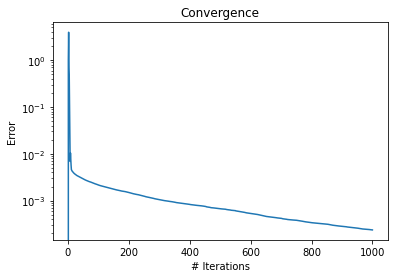

In [10]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

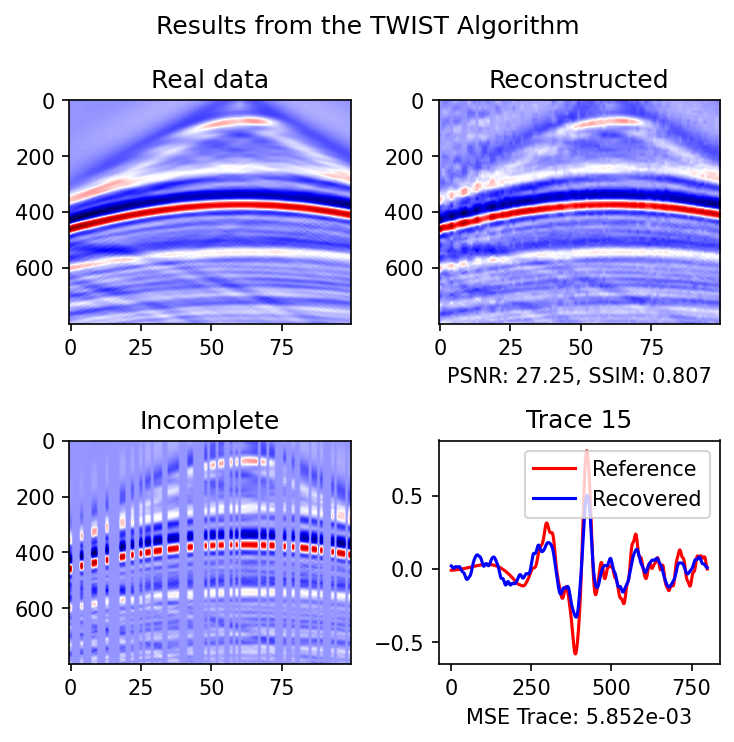

In [11]:
# -----------------
x_rec = x_result_TWIST.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

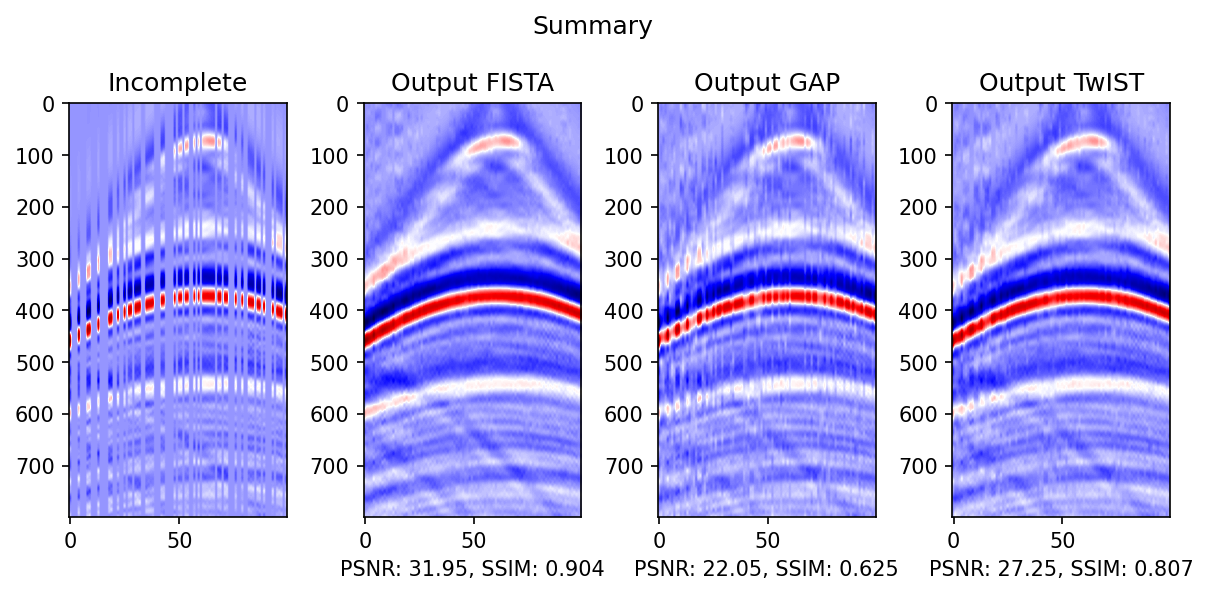

In [12]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(1,4,dpi=150,figsize=(8, 4))
fig.suptitle('Summary')

axs[0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[0].set_title('Incomplete')


axs[1].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[1].set_title('Output FISTA')
axs[1].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_FISTA[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_FISTA[:, H_elim]):.3f}')


axs[2].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[2].set_title('Output GAP')
axs[2].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_GAP[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_GAP[:, H_elim]):.3f}')


axs[3].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[3].set_title('Output TwIST')
axs[3].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_TWIST[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')




fig.tight_layout()
plt.show()